In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('final_df.csv')

# Data Cleaning and EDA

Labeling the columns and getting rid of the extra index columns that remained after concatination of dataframes 

In [3]:
df = df.rename(columns={'0': 'mission', '1': 'tagline', '2': 'name', '3': 'category_name', '4': 'category_ID', '5': 'cause_name', '6': 'cause_ID', '7': 'city', '8': 'state', '9': 'zipcode', 
                   '10': 'current_score', '11': 'current_rating', '12': 'advisories', '13': 'accountability_score', '14': 'accountability_rating', '15': 'irs_org_type', '16': 'irs_classification', 
                   '17': 'npo_affiliation', '18': 'foundation_status', '19': 'irs_org_classification', '20': 'tax_deductibility', '21': 'npo_status', '22': 'org_assets', '23': 'org_income', 
                   '24': 'fin_score', '25': 'fin_rating'})

In [4]:
#Null values are tagline(23) advisories(10794), irs_org_type(1906), irs_classification(1906), tax_deductability(9), npo_status(9), org_assets(117), org_income(117)

In [5]:
df['npo_affiliation'].value_counts()

Independent - the organization is an independent organization or an independent auxiliary (i.e., not affiliated with a National, Regional, or Geographic grouping of organizations).                               10093
Subordinate - the organization is a subordinate in a group ruling.                                                                                                                                                   429
Central - the organization is a parent (group ruling) and is not a church or 501(c)(1) organization.                                                                                                                 169
Central - the organization is a central type organization (no group exemption) of a National, Regional or Geographic grouping of organizations.                                                                      102
Intermediate - the organization is an intermediate organization (no group exemption) of a National, Regional or Geographic grouping 

In [6]:
#the majority of the organizations are 501(c)(3). Because of that we can drop this column
df['npo_status'].value_counts()

501(c)(3)    10809
Name: npo_status, dtype: int64

In [7]:
#almost all of the organiations in the dataset are also tax deductible 
df['tax_deductibility'].value_counts()

Contributions are deductible        10802
Deductibility not specified             6
Contributions are not deductible        1
Name: tax_deductibility, dtype: int64

In [8]:
mean_org_assets = df['org_assets'].mean()
median_org_assets = df['org_assets'].median()

print('The mean assets for nonprofit organizations in this dataset is', + mean_org_assets)
print('The median income for nonprofit organizations in this dataset is', + median_org_assets)

The mean assets for nonprofit organizations in this dataset is 39589776.82702551
The median income for nonprofit organizations in this dataset is 7078600.0


In [9]:
mean_income = df['org_income'].mean()
median_income = df['org_income'].median()

print('The mean assets for nonprofit organizations in this dataset is', + mean_income)
print('The median income for nonprofit organizations in this dataset is', + median_income)

The mean assets for nonprofit organizations in this dataset is 24284774.345201384
The median income for nonprofit organizations in this dataset is 4861565.0


### Current Rating Distribution

In [10]:
#View current ratings 
df['current_rating'].value_counts()

3    4955
4    4304
2    1238
1     272
0      49
Name: current_rating, dtype: int64

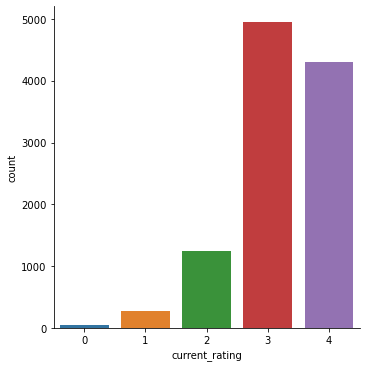

In [11]:
sns.catplot(x=df['current_rating'], kind='count', palette=None, data= df)

### Accountability Rating Distribution

In [12]:
#Accountability_rating value counts
df['accountability_rating'].value_counts()

4    6585
3    3183
2     632
1     322
0      96
Name: accountability_rating, dtype: int64

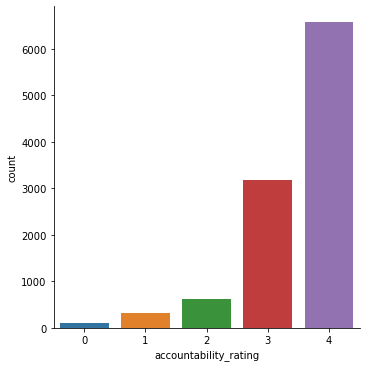

In [13]:
sns.catplot(x=df['accountability_rating'], kind='count', palette=None, data= df)

### Financial Rating Distribution

In [14]:
#fin_rating
df['fin_rating'].value_counts()

3    4509
4    3883
2    1890
1     479
0      57
Name: fin_rating, dtype: int64

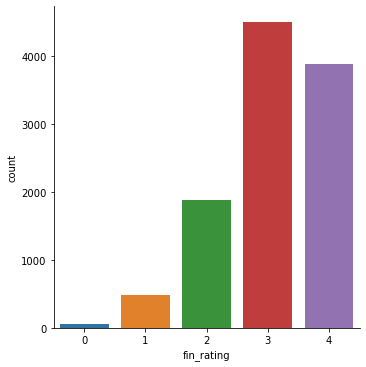

In [15]:
sns.catplot(x=df['fin_rating'], kind='count', palette=None, data= df)

In [16]:
# #Dropping unhelpful values  advisories because there are 10794 missing values
df = df.drop(columns=['index', 'Unnamed: 0','advisories', 'npo_status', 'tax_deductibility', 
                    'irs_org_type', 'irs_classification', 'irs_org_type', 'irs_org_classification', 
                    'mission', 'tagline'])

In [16]:
# hm_df = df.drop(columns= [ 'name', 'category_name', 'cause_name', 'city', 'state', 'npo_affilitation', 'foundation_status'])
# hm_df

<AxesSubplot:>

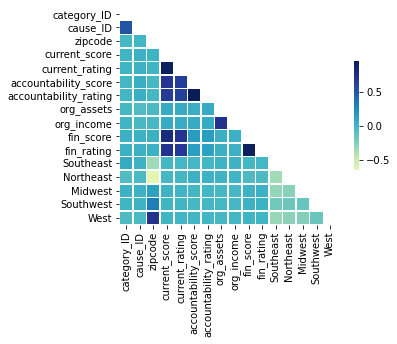

In [28]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
#f, ax = plt.subplots(figsize=11,9)
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = 'YlGnBu', 
            center = 0, square = True, 
            linewidths =.5, cbar_kws = {'shrink': .5})

From this we see that 

category_ID has a strong correlation with cause_ID

current_score has strong correlations with fin_rating, fin_score, accountability_rating, accountability_score



# Feature Engineering

Grouped states into regions using National Geographic

In [17]:
df['Southeast'] = (df['state'] == 'MD') | (df['state'] =='DC') | (df['state'] =='DE') | (df['state'] =='WV') | (df['state'] =='VA') | (df['state'] =='KY') | (df['state'] =='NC') | (df['state'] =='TN') | (df['state'] =='SC') | (df['state'] =='GA') | (df['state'] =='FL') | (df['state'] =='AL') | (df['state'] =='MS') | (df['state'] =='AR') | (df['state'] =='LA')
df['Southeast'] = df['Southeast'].replace([True, False] , [1,0]) 
                                          
df['Northeast'] = (df['state'] == 'ME') | (df['state'] =='NH') | (df['state'] =='MA') | (df['state'] =='VT') | (df['state'] =='RI') | (df['state'] =='CT') | (df['state'] =='NY') | (df['state'] =='PA') | (df['state'] == 'NJ')
df['Northeast'] = df['Northeast'].replace([True, False] , [1,0])

df['Midwest'] = (df['state'] == 'OH') | (df['state'] =='MI') | (df['state'] =='IN') | (df['state'] =='IL') | (df['state'] =='WI') | (df['state'] =='MN') | (df['state'] =='IA') | (df['state'] =='MO') | (df['state'] =='ND') | (df['state'] =='SD') | (df['state'] =='NE') | (df['state'] =='KS')
df['Midwest'] = df['Midwest'].replace([True, False], [1,0]) 


df['Southwest'] = (df['state'] == 'AZ') | (df['state'] == 'NM') | (df['state'] =='TX') | (df['state'] =='OK')
df['Southwest'] = df['Southwest'].replace([True, False], [1,0])


df['West'] = (df['state'] =="CA") | (df['state'] =="HI") |  (df['state'] == "AK") | (df['state'] == "OR") | (df['state'] == "WA") | (df['state'] =="ID") | (df['state'] =="NV") | (df['state'] =="UT") | (df['state'] =="CO") | (df['state'] =="WY") | (df['state'] =="MT")
df['West'] = df['West'].replace([True, False], [1,0])

## Creating Dummy Variables

In [18]:
#Creating dummy variables
df_foundation_status = pd.get_dummies(df['foundation_status'], drop_first= True)
df_category_name = pd.get_dummies(df['category_name'], drop_first= True)
df_cause_name = pd.get_dummies(df['cause_name'], drop_first= True)
df_npo_affiliation = pd.get_dummies(df['npo_affiliation'], drop_first= True)


#Concat dummy variables dataframes with original dataframe, dropping duplicates and deleting the index column
df_foundation_status = pd.concat([df, df_foundation_status], axis=1)
df_category_name = pd.concat([df, df_category_name], axis=1)
df_cause_name = pd.concat([df, df_cause_name], axis=1)
df_npo_affiliation = pd.concat([df, df_npo_affiliation ], axis=1)

# Combining dummy variables with each other 
df2 = pd.concat([df_category_name, df_foundation_status], axis=1)
df3 = pd.concat([df_npo_affiliation, df_cause_name], axis=1)


# Combining dataframes into final dataframe
df4 = pd.concat([df2, df3], axis=1)

#Dropping all duplicates
df4 = df4.T.drop_duplicates().T

In [19]:
df4.head()

,name,category_name,category_ID,cause_name,cause_ID,city,state,zipcode,current_score,current_rating,accountability_score,accountability_rating,npo_affiliation,foundation_status,org_assets,org_income,fin_score,fin_rating,Southeast,Northeast,Midwest,Southwest,West,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy,509(a)(3) Type II,509(a)(3) Type III functionally integrated,Church 170(b)(1)(A)(i),Governmental unit 170(b)(1)(A)(v),Hospital or medical research organization 170(b)(1)(A)(iii),"Organization that normally receives no more than one-third of its support from gross investment income and unrelated business income and at the same time more than one-third of its support from contributions, fees, and gross receipts related to exempt purposes. 509(a)(2)",Organization which operates for benefit of college or university and is owned or operated by a governmental unit 170(b)(1)(A)(iv),Organization which receives a substantial part of its support from a governmental unit or the general public 170(b)(1)(A)(vi),Organizations operated solely for the benefit of and in conjunction with organizations described in 10 through 16 above. 509(a)(3),Private non-operating foundation,School 170(b)(1)(A)(ii),Central - the organization is a parent (group ruling) and is a church or 501(c)(1) organization.,Central - the organization is a parent (group ruling) and is not a church or 501(c)(1) organization.,"Independent - the organization is an independent organization or an independent auxiliary (i.e., not affiliated with a National, Regional, or Geographic grouping of organizations).","Intermediate - the organization is an intermediate organization (no group exemption) of a National, Regional or Geographic grouping of organizations (such as a state headquarters of a national organization).",Subordinate - the organization is a subordinate in a group ruling.,"Animal Rights, Welfare, and Services","Botanical Gardens, Parks, and Nature Centers",Children's and Family Services,Community Foundations,Development and Relief Services,"Diseases, Disorders, and Disciplines",Early Childhood Programs and Services,Education Policy and Reform,Environmental Protection and Conservation,"Food Banks, Food Pantries, and Food Distribution",Homeless Services,Housing and Neighborhood Development,Humanitarian Relief Supplies,"International Peace, Security, and Affairs",Jewish Federations,"Libraries, Historical Societies and Landmark Preservation",Medical Research,Multipurpose Human Service Organizations,Museums,Non-Medical Science & Technology Research,Patient and Family Support,Performing Arts,Public Broadcasting and Media,Religious Activities,Religious Media and Broadcasting,Rescue Missions,Scholarship and Financial Support,Social Services,Social and Public Policy Research,Special Education,Treatment and Prevention Services,United Ways,Wildlife Conservation,"Youth Development, Shelter, and Crisis Services",Youth Education Programs and Services,Zoos and Aquariums
0,Impact America,Human Services,6,Social Services,29,Birmingham,AL,35209,85.98,3,82,3,Independent - the organization is an independe...,Organization which receives a substantial part...,2.03274e+06,3.36432e+06,91.7,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Four Corners Ministries,Religion,9,Religious Activities,26,Opelika,AL,36801,89.04,3,85,3,Independent - the organization is an independe...,Organization that normally receives no more th...,2.6023e+06,1.93095e+06,96.1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Mobile Symphony Orchestra,"Arts, Culture, Humanities",2,Performing Arts,4,Mobile,AL,36602,75.03,2,89,3,Independent - the organization is an independe...,Organization that normally receives no more th...,

In [23]:
df4 = df4.drop(columns = ['category_name', 'cause_name', 'city', 'state', 'foundation_status', 'npo_affiliation'])

In [24]:
df4.shape

(10818, 79)

In [25]:
df4['Independent - the organization is an independent organization or an independent auxiliary (i.e., not affiliated with a National, Regional, or Geographic grouping of organizations).'].value_counts()

1    10093
0      725
Name: Independent - the organization is an independent organization or an independent auxiliary (i.e., not affiliated with a National, Regional, or Geographic grouping of organizations)., dtype: int64

In [26]:
df4.head()

,name,category_ID,cause_ID,zipcode,current_score,current_rating,accountability_score,accountability_rating,org_assets,org_income,fin_score,fin_rating,Southeast,Northeast,Midwest,Southwest,West,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy,509(a)(3) Type II,509(a)(3) Type III functionally integrated,Church 170(b)(1)(A)(i),Governmental unit 170(b)(1)(A)(v),Hospital or medical research organization 170(b)(1)(A)(iii),"Organization that normally receives no more than one-third of its support from gross investment income and unrelated business income and at the same time more than one-third of its support from contributions, fees, and gross receipts related to exempt purposes. 509(a)(2)",Organization which operates for benefit of college or university and is owned or operated by a governmental unit 170(b)(1)(A)(iv),Organization which receives a substantial part of its support from a governmental unit or the general public 170(b)(1)(A)(vi),Organizations operated solely for the benefit of and in conjunction with organizations described in 10 through 16 above. 509(a)(3),Private non-operating foundation,School 170(b)(1)(A)(ii),Central - the organization is a parent (group ruling) and is a church or 501(c)(1) organization.,Central - the organization is a parent (group ruling) and is not a church or 501(c)(1) organization.,"Independent - the organization is an independent organization or an independent auxiliary (i.e., not affiliated with a National, Regional, or Geographic grouping of organizations).","Intermediate - the organization is an intermediate organization (no group exemption) of a National, Regional or Geographic grouping of organizations (such as a state headquarters of a national organization).",Subordinate - the organization is a subordinate in a group ruling.,"Animal Rights, Welfare, and Services","Botanical Gardens, Parks, and Nature Centers",Children's and Family Services,Community Foundations,Development and Relief Services,"Diseases, Disorders, and Disciplines",Early Childhood Programs and Services,Education Policy and Reform,Environmental Protection and Conservation,"Food Banks, Food Pantries, and Food Distribution",Homeless Services,Housing and Neighborhood Development,Humanitarian Relief Supplies,"International Peace, Security, and Affairs",Jewish Federations,"Libraries, Historical Societies and Landmark Preservation",Medical Research,Multipurpose Human Service Organizations,Museums,Non-Medical Science & Technology Research,Patient and Family Support,Performing Arts,Public Broadcasting and Media,Religious Activities,Religious Media and Broadcasting,Rescue Missions,Scholarship and Financial Support,Social Services,Social and Public Policy Research,Special Education,Treatment and Prevention Services,United Ways,Wildlife Conservation,"Youth Development, Shelter, and Crisis Services",Youth Education Programs and Services,Zoos and Aquariums
0,Impact America,6,29,35209,85.98,3,82,3,2.03274e+06,3.36432e+06,91.7,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Four Corners Ministries,9,26,36801,89.04,3,85,3,2.6023e+06,1.93095e+06,96.1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Mobile Symphony Orchestra,2,4,36602,75.03,2,89,3,1.16233e+06,1.59705e+06,66.45,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Big Oak Ranch,6,16,35146,95.01,4,93,4,4.98618e+07,2.29289e+07,99.11,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Community Foundation of Greater Huntsville,10,22,35801,95.47,4,96,4,2.52299e+07,1.29899e+07,95,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

# Saving DF as a CSV File

In [27]:
df4.to_csv('df4.csv')